In [15]:
!pip install -- opencv-python


ERROR: Could not find a version that satisfies the requirement user (from versions: none)
ERROR: No matching distribution found for user


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [2]:
def image_read(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap = "gray")
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap = "gray")
    ax2.set(xticks = [], yticks = [], title = title2)

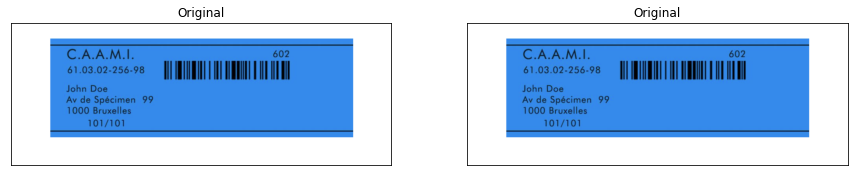

In [49]:
path = "v2.png"
image = cv2.imread(path)
plot_image = image_read(image, image, title1 = "Original", title2 = "Original")

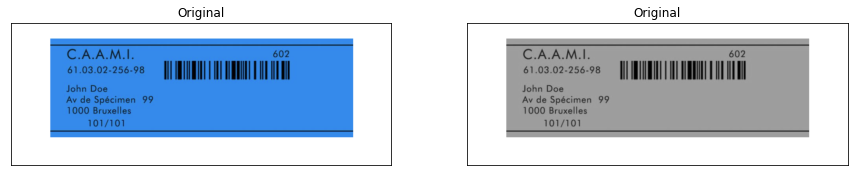

In [50]:
imgGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_image = image_read(image, imgGray, title1 = "Original", title2 = "Original")

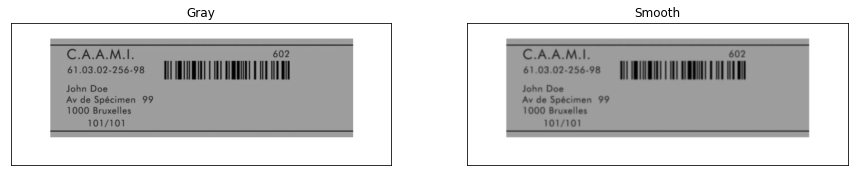

In [51]:
smooth = cv2.bilateralFilter(imgGray, 9, 75, 75)

image_read(imgGray, smooth, title1 = "Gray", title2 = "Smooth")

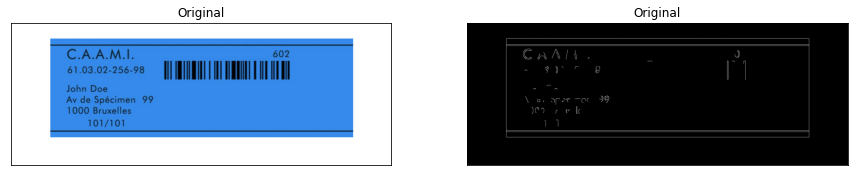

In [52]:
imgCanny = cv2.Canny(image, 400, 600)
plot_image = image_read(image, imgCanny, title1 = "Original", title2 = "Original")

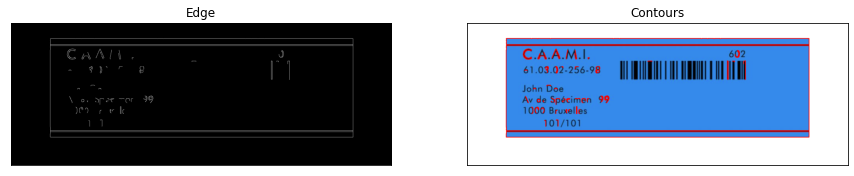

In [53]:
contours, new = cv2.findContours(imgCanny.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()

_ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

image_read(imgCanny, image_copy, title1 = "Edge", title2 = "Contours")

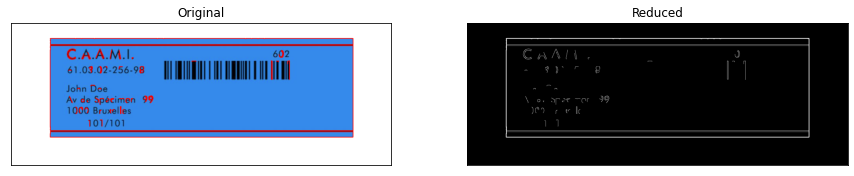

In [54]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]

image_reduced = imgCanny.copy()
_ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

image_read(image_copy, image_reduced, title1 = "Original", title2 = "Reduced")

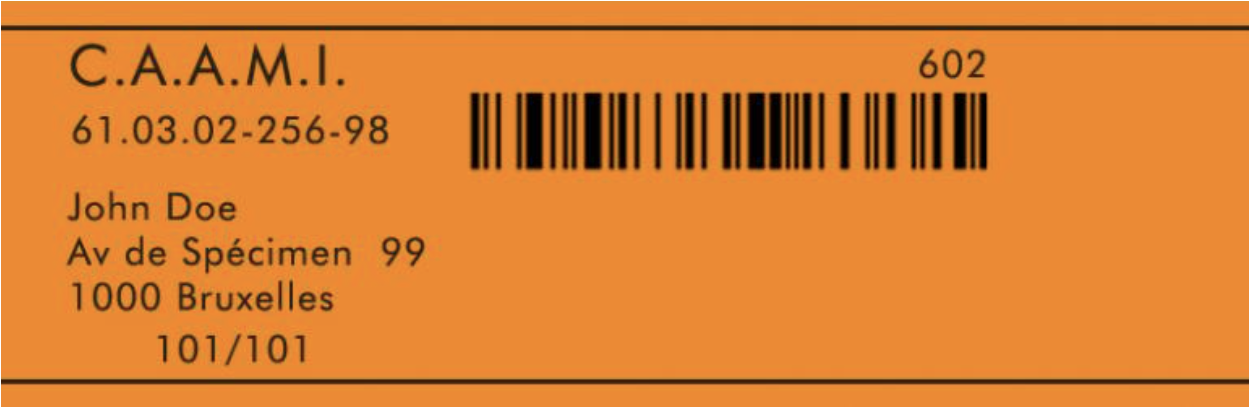

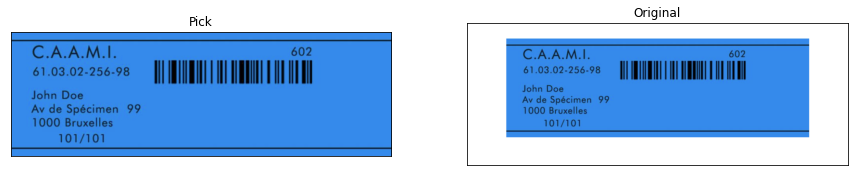

In [58]:
pick = None
from google.colab.patches import cv2_imshow
for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.4* a, True)
    if len(edge_count) == 1:
        x, y, w, h = cv2.boundingRect(i)
        pick = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", pick)
cv2_imshow(pick)

image_read(pick, image, title1 = "Pick", title2 = "Original")